# Prosper Loan Dataset Exploration
## by Lekan Adenusi

## Introduction
This document explores the prosper loan dataset provided by Udacity. For a bit of background, Prosper Loan is a loan-lending platform that offers personal loans to borrowers with a fixed interest rate.

## Preliminary Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the dataset
loan_df = pd.read_csv('prosperLoanData.csv',)

In [59]:
# Display the shape of the data
print('Dataset shape: {} rows and {} columns'.format(*loan_df.shape))

Dataset shape: 113937 rows and 81 columns


In [60]:
# Print Datatypes
set(loan_df.dtypes)

{dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')}

In [61]:
loan_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [74]:
loan_df.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                            84113
Term                                       0
LoanStatus                                 0
ClosedDate                             57990
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ListingCategory (numeric)                  0
BorrowerState                           5515
Occupation                              3529
EmploymentStatus                        2255
EmploymentStatusDuration                7625
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
GroupKey  

In [20]:
# Let us check whether there are duplicate values
loan_df.duplicated().sum()

0

### What is the structure of your dataset?
There are 113,937 records of loans with 81 attributes for each record. From preliminary wrangling and with the help of the data dictionary, all the null values in the dataset appear for relevant reasons and do not need to be cleaned/imputed except when required. No duplicate values exist.

### What is/are the main feature(s) of interest in your dataset?
My main feature of interest is the Borrower APR (Annual Percentage Rate). Concretely, I want to know what features and observable characteristics are most associated with the APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Going on, I think the Original loan amount, debt-income ratio, loan term, the borrower's attributes as regards whether they are a home owner or not, their occupation, employment status, and even more, would be valuable to my investigation.

## Univariate Exploration

Before beginning my analysis, I'll make the prosper rating and loan term columns ordered categorical variables. Then, I'll create a new column which will be a modified form of the Loan status. This way, it becomes easier to zoom in on my loan statuses of interest.

In [3]:
# Create ordered categorical variables
categorical_prosper_rating = pd.CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)
categorical_term = pd.CategoricalDtype(categories=[60, 36, 12], ordered=True)

loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(categorical_prosper_rating)
loan_df['Term'] = loan_df['Term'].astype(categorical_term)

In [4]:
# Create a new column for the modified prosper ratings
modify_loan_status = lambda loan_status: 'Past Due' if 'Past' in loan_status else loan_status
loan_df['LoanStatusMod'] = loan_df['LoanStatus'].apply(modify_loan_status)

In [5]:
loan_df['LoanStatusMod'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatusMod, dtype: int64

In [6]:
# set one color to use when we do not need seaborn's default
sns_color = sns.color_palette()[0]

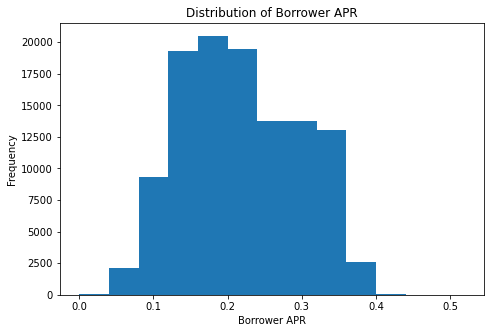

In [9]:
fig, ax = plt.subplots(figsize=(7.6, 5))

bins = np.arange(0, 0.53, 0.04)
ax.hist(loan_df['BorrowerAPR'], bins=bins)

plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
plt.title('Distribution of Borrower APR');

The Borrower Annual Percentage Rate (APR henceforth) almost follows a normal distribution. There is nothing particularly unusual about this except that I think an annual percentage rate of around **0.5** is quite high, which implies that in some cases, the interest on the loan increases by 50% of the original loan amount each year! There might be some interesting relationships waiting to be uncovered as we move on.

Next up, we explore some of the features, starting with the employment status.

In [14]:
normalized_count_of_emp_status = loan_df['EmploymentStatus'].value_counts(normalize=True)
normalized_count_of_emp_status

Employed         0.602918
Full-time        0.236006
Self-employed    0.054746
Not available    0.047863
Other            0.034113
Part-time        0.009752
Not employed     0.007484
Retired          0.007117
Name: EmploymentStatus, dtype: float64

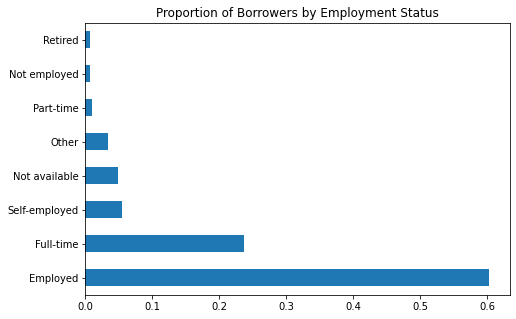

In [21]:
plt.figure(figsize=(7.6, 5))
normalized_count_of_emp_status.plot(kind='barh',
                                    title='Proportion of Borrowers by Employment Status');

Majority of the borrowers are employed. Concretely, Employed people constitute **60%** of the borrowers. Retirees and unemployed persons form only **1.4%** of this population. The next question we might probably ask is what could the employed population be needing loans for? Let's examine the distribution of the loan amounts and the monthly loan payments.

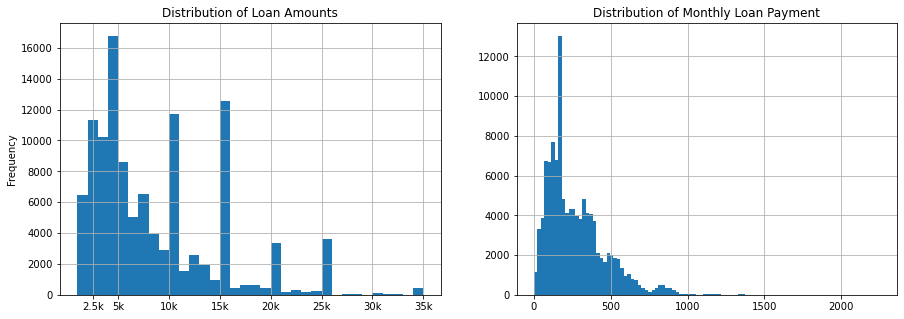

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

bins = np.arange(1000, 36000, 1000)
loan_df['LoanOriginalAmount'].plot(kind='hist', bins=bins,
                                   xlabel='Loan Amount', ylabel='Frequency',
                                   title='Distribution of Loan Amounts', ax=ax1)
plt.sca(ax1)
plt.xticks([2.5e3, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['2.5k', '5k', '10k', '15k', '20k', '25k', '30k', '35k'])
ax1.grid(True)

plt.sca(ax2)
ax2.hist(loan_df['MonthlyLoanPayment'], bins=100)
ax2.set_title('Distribution of Monthly Loan Payment')
ax2.grid(True);

In [14]:
loan_df['LoanOriginalAmount'].value_counts().head(10)

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
3000      5749
25000     3630
20000     3291
1000      3206
2500      2992
Name: LoanOriginalAmount, dtype: int64

In [26]:
loan_df['MonthlyLoanPayment'].describe()

count    113823.000000
mean        272.285984
std         192.467753
min           0.000000
25%         131.525000
50%         217.740000
75%         371.145000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

The spikes in the first histogram reveal that most loans are usually procured in multiples of 1,000. The counts of each loan amount equally shows that majority of them are in multiples of 1000 as already seen in the plot. Besides the occasional spikes, the distribution of the loan amounts is right-skewed with relatively only few amounts around 20k USD and above. The monthly loan payment is also right-skewed.

Next, we shall examine the distribution of monthly incomes and debt-income ratio of the listings. First, I will check the summary statistics for the Stated Monthly Income.

In [13]:
loan_df['StatedMonthlyIncome'].describe(percentiles=[0.999])

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
50%      4.666667e+03
99.9%    4.380333e+04
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

There is at least one outlier here. The 99.9th percentile for the monthly income is just around 40k USD, while the maximum value is around 1.7 million USD. To prevent these outliers from skewing our results, I would drop incomes greater than the 99.9th percentile. But let's examine these outliers just a bit.

In [102]:
loan_df['StatedMonthlyIncome'].idxmax()

53167

In [24]:
percentile_99_9 = loan_df['StatedMonthlyIncome'].quantile(0.999)

In [21]:
loan_df[ loan_df['StatedMonthlyIncome'] > percentile_99_9].sort_values(by='StatedMonthlyIncome', ascending=False).head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanStatusMod
53167,F9AD3540233111834F3D8A0,560783,2012-02-20 12:53:44.577000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,4.0,3,OR,Professional,Self-employed,114.0,True,False,NaN,2012-02-20 12:53:40,740.0,759.0,1983-06-18 00:00:00,19.0,17.0,35.0,15,1988.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,42855.0,0.61,26168.0,33.0,1.00,0.0,NaN,"$100,000+",False,1.750003e+06,3D5836438779123523A2DA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,25,60925,4000,2012-02-24 00:00:00,Q1 2012,415B354030599221875E1CE,173.71,5867.39,3998.78,1868.61,-57.63,-59.06,0.0,0.0,0.0,1.0,0,0,0.0,2,Current
53014,F5D13567265432980C80C7D,694401,2013-01-04 20:02:24.207000000,NaN,12,Completed,2014-01-23 00:00:00,0.25785,0.1795,0.1695,0.1559,0.0975,0.0584,3.0,D,3.0,3,CA,Other,Self-employed,117.0,True,False,NaN,2013-01-04 20:02:21,720.0,739.0,1999-01-07 00:00:00,8.0,8.0,31.0,6,154.0,0.0,14.0,0.0,0.0,3.0,3.0,0.0,5911.0,0.62,3091.0,25.0,0.92,0.0,NaN,"$100,000+",False,6.185478e+05,04DF3672370940669E7B16B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,14,82437,4000,2013-01-23 00:00:00,Q1 2013,59903566572414517E2E33A,366.62,4397.64,4000.00,397.64,-22.17,0.00,0.0,0.0,0.0,1.0,0,0,0.0,93,Completed
17411,873B351262140884511D81C,501462,2011-04-08 21:58:21.847000000,NaN,36,Completed,2013-04-11 00:00:00,0.35643,0.3199,0.3099,0.2957,0.1470,0.1487,2.0,E,5.0,1,HI,Professional,Employed,121.0,True,False,NaN,2011-04-08 21:58:10,660.0,679.0,2001-12-05 00:00:00,8.0,7.0,18.0,2,312.0,4.0,15.0,0.0,0.0,5.0,0.0,0.0,12990.0,0.86,2114.0,16.0,0.62,0.0,0.0,"$100,000+",True,4.833333e+05,77AC3617940949299F18FAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,34,49178,7500,2011-05-06 00:00:00,Q2 2011,70343511744352918C2AEA6,326.62,9118.73,7500.00,1618.73,-12.68,0.00,0.0,0.0,0.0,1.0,0,0,0.0,128,Completed
57133,BF643510331462185E12917,499194,2011-03-24 14:50:00.220000000,NaN,36,Current,NaN,0.35643,0.3199,0.3099,0.2957,0.1470,0.1487,2.0,E,5.0,2,CT,Other,Employed,271.0,True,False,NaN,2011-03-24 14:49:52,680.0,699.0,1992-03-01 00:00:00,3.0,3.0,24.0,0,0.0,1.0,2.0,1.0,639.0,0.0,0.0,0.0,0.0,0.00,0.0,23.0,0.86,0.0,0.0,"$100,000+",True,4.666667e+05,5D0136156133365609F840F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,35,48269,4000,2011-04-05 00:00:00,Q2 2011,604535101376173891FE027,174.20,5922.80,3655.90,2266.90,-70.90,0.00,0.0,0.0,0.0,1.0,0,0,0.0,72,Current
8066,37043512916744588463B5A,500651,2011-04-02 13:58:32.227000000,NaN,36,Completed,2012-01-26 0

In [7]:
loan_df =  loan_df[ loan_df['StatedMonthlyIncome'] <= percentile_99_9 ]

NameError: name 'percentile_99_9' is not defined

<AxesSubplot:>

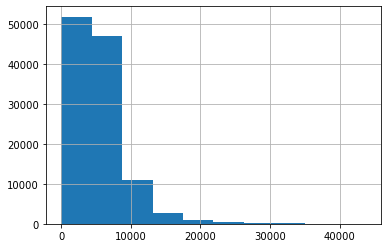

In [23]:
loan_df['StatedMonthlyIncome'].hist()

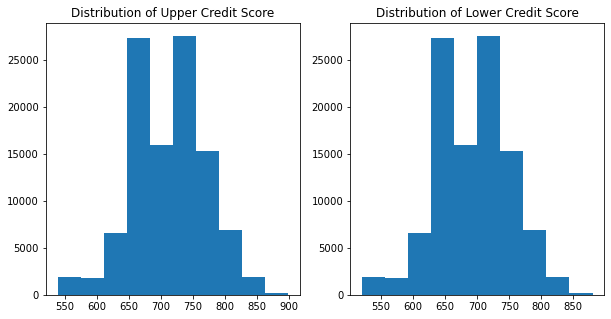

In [49]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)

ax1.hist(data=loan_df, x='CreditScoreRangeUpper')
ax1.set_title('Distribution of Upper Credit Score')

ax2.hist(data=loan_df, x='CreditScoreRangeLower')
ax2.set_title('Distribution of Lower Credit Score');

Both credit scores have a similar distribution. This suggests that the upper credit score might just be the lower credit score added to some constant value. 

In [25]:
loan_df = loan_df[ ~loan_df['IncomeRange'].isin(['Not employed', 'Not displayed']) ]

# create an ordered income range
income_range_ordered = pd.CategoricalDtype(['$0', '$1-24,999', '$25,000-49,999',
                                            '$50,000-74,999', '$75,000-99,999','$100,000+'], ordered=True)
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(income_range_ordered)

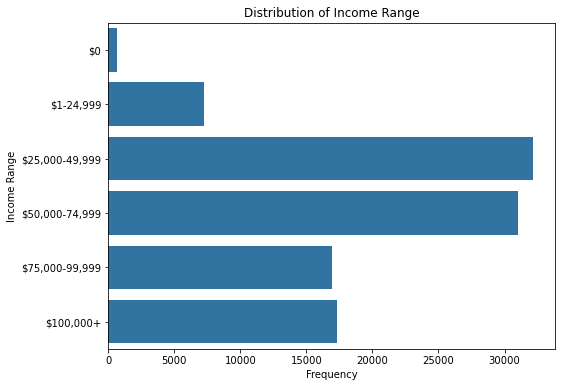

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=loan_df, y='IncomeRange', color=sns_color, ax=ax)
plt.title('Distribution of Income Range')
plt.xlabel('Frequency')
plt.ylabel('Income Range');

Most of the borrowers earn between 25k to 75k USD; a good number of them also earn more than this. This is consistent what what we saw earlier that a large proportion of the borrowers are employed. Next, let's examine four other features that might be helpful.

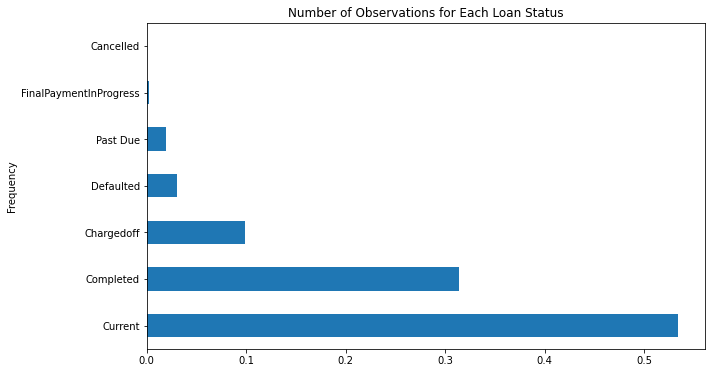

In [108]:
plt.figure(figsize=(10, 6))
loan_df['LoanStatusMod'].value_counts(normalize=True).plot(kind='barh', ylabel='Frequency',
                                                           title='Number of Observations for Each Loan Status');

In [68]:
loan_df['Term'].value_counts()

36    79371
60    24431
12     1588
Name: Term, dtype: int64

In [117]:
loan_df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [22]:
loan_df['IsBorrowerHomeowner'].value_counts()

True     57392
False    56431
Name: IsBorrowerHomeowner, dtype: int64

- Almost half of the loan statuses are current while very few loans are past their due dates as at when this data was collected.
- Loan terms are usually 1, 3, or 5 years, with 3 years being the most occurrent. This may be dependent on how much is being loaned out, as well as borrower background, such as their monthly income.
- Loanees with a prosper rating of AA (the best) comprise the smallest proportion of the data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The borrower APR has quite a few high values, some up to 0.50, which seems unusually high as this means 50% of the original loan amount has to be paid every year. The distribution was also almost normal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The Stated Monthly Income had a few strong outliers. It turned out that the 99.9th percentile for this variable hovers just around 48,000, meanwhile the maximum income here occurs at around 1.7 million. For completeness, I decided to remove observations whose monthly income was higher than the 99.9th percentile. Also, all the continuous variables explore are skewed to the right. 

## Bivariate Exploration

To start off with this section, I want to explore the relationships between some of the features earlier introduced and the APR. Let's start by examining the correlations.

In [ ]:
# numeric variables of interest
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'LenderYield', 'CreditScoreRangeLower', 
                'CreditScoreRangeUpper', 'MonthlyLoanPayment']

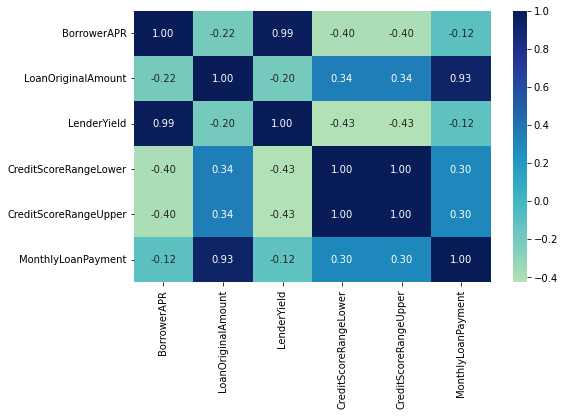

In [67]:
plt.figure(figsize = [8, 5])
sns.heatmap(loan_df_subset[numeric_vars].corr(),
            annot = True,
            fmt = '.2f',
            cmap='YlGnBu',
            center = 0);

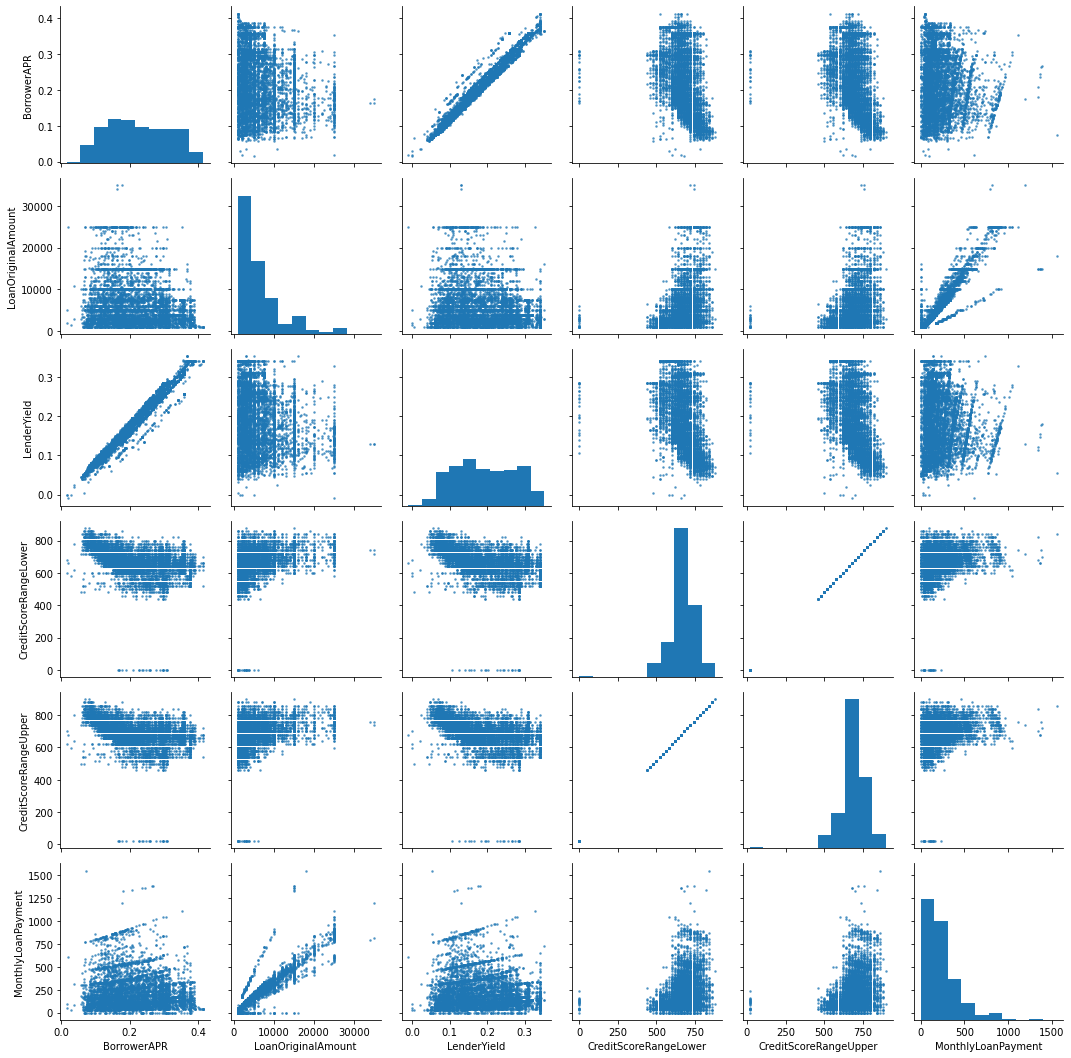

In [24]:
# Create a pair grid
pair_grid = sns.PairGrid(loan_df_subset.sample(frac=0.1)[numeric_vars])

pair_grid.map_diag(plt.hist)
pair_grid.map_offdiag(plt.scatter, s=2.5, alpha=0.6)

Observe that a moderate and negative correlation exists between the credit scores and the APR, so that a higher credit score attracts a lower APR and vice versa. There's also an almost unity positive correlation between APR and the lender yield. This isn't unexpected. From the data dictionary, the lender yield is simply the borrower rate less the servicing fee. So the high correlation is expected. Also observe that the credit scores have a perfect correlation with themselves, confirming my earlier thought concerning their similar distributions.

Further, notice there's a weak relationship between APR and the loaned amount. What I'll do next is to partition the loaned amount into bins and compare the distribution of the APR across each group. For this, a point plot or boxplot will do. Let's use both of them!

In [54]:
# create a function to bin Loaned Amounts
def bin_loan_amount(amount):
    if amount >= 1000 and amount <= 5000:
        return '1-5K'
    elif amount > 5000 and amount <= 15000:
        return '5-15K'
    else:
        return '> 15K'

In [55]:
loan_df['LoanAmountBin'] = loan_df['LoanOriginalAmount'].apply(lambda x: bin_loan_amount(x))

# make the binned amounts ordered categories
cat_loan_bin = pd.CategoricalDtype(['1-5K', '5-15K', '> 15K'], ordered=True)
loan_df['LoanAmountBin'] = loan_df['LoanAmountBin'].astype(cat_loan_bin)

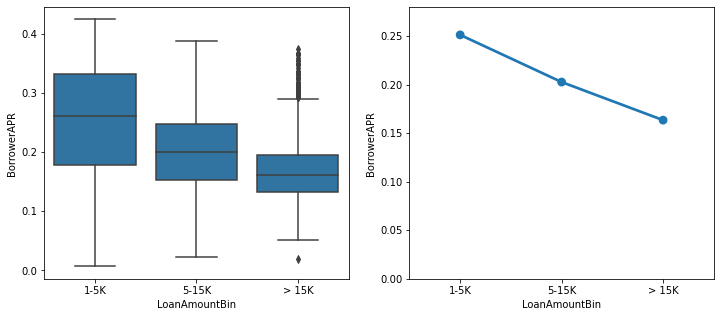

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.boxplot(x='LoanAmountBin',
            y='BorrowerAPR',
            data=loan_df,
            color=sns_color,
            ax=ax1);

sns.pointplot(x='LoanAmountBin',
              y='BorrowerAPR',
              data=loan_df,
              estimator=np.mean,
              ax=ax2)

ax2.set_ylim( [0, 0.28] );

This is interesting. The boxplots show that high loan amounts, on general, incure relatively lower APR, and vice versa. Also, notice that the group 1-5K has the highest variance, while the group > 15K has the lowest variance. This shows that smaller loans have a more variable APR, compared to higher amounts of loans. In the second plot, the data was aggregated by its mean, and we see again how the line slopes down, supporting our observation from the boxplot. 

Now let's see how the APR might be affected by the Prosper Score. Recall that the order of the Prosper Rating, from good to bad is: **AA > A > B > C > D > E > HR**

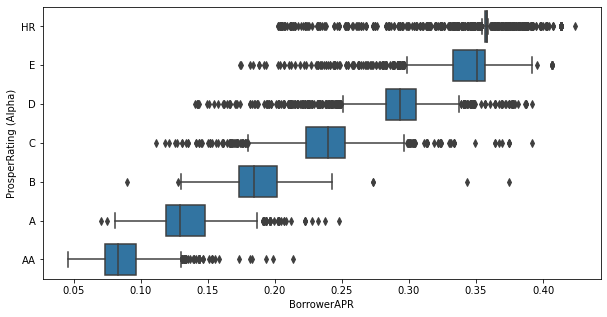

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(y='ProsperRating (Alpha)',
            x='BorrowerAPR',
            data=loan_df_subset,
            ax=ax,
            color=sns_color,);

In [47]:
loan_df.groupby(by='ProsperRating (Alpha)')['BorrowerAPR'].var().sort_values(ascending=False)

ProsperRating (Alpha)
E     0.000613
D     0.000604
C     0.000543
HR    0.000384
B     0.000336
AA    0.000286
A     0.000268
Name: BorrowerAPR, dtype: float64

I decided to examine the variances of my variable of interest grouped by the prosper rating. Remember our observation from the last plot? Loans with 1-5K borrowed had the highest variance. Perhaps, this could be linked also to the prosper rating? We'll investigate this in the next section. 

For now though, let's check the distribution of the loan amounts grouped by the prosper rating. We'll see that the better the prosper rating, the higher the variance in the amounts loaned out.

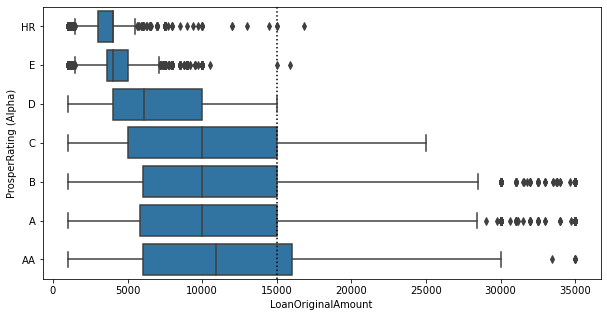

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='LoanOriginalAmount',
            y='ProsperRating (Alpha)',
            data=loan_df, color=sns_color, zorder=2);

plt.axvline(15000, color='black', linestyle='dotted', zorder=1)

A vertical line has been drawn at a loan amount of 15,000 for emphasis. Remember that loans greater than 15K generally have a smaller APR and also have a lower variance. Well, from this boxplot, it's clear that loans greater than 15K are associated only with prosper ratings C, B, A, and AA. The APR for these prosper ratings also happens to vary less. This explains why the APR for loans higher than 15K has the least variance.

To round off this section, I want to examine the distribution of the APR by income range and the length of the loan.

<AxesSubplot:xlabel='BorrowerAPR', ylabel='IncomeRange'>

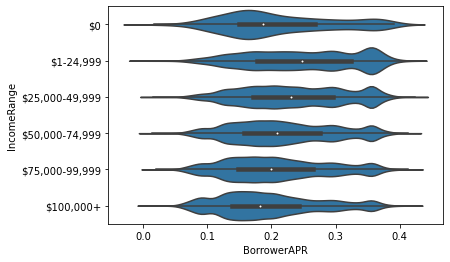

In [70]:
sns.violinplot(x='BorrowerAPR', y='IncomeRange', data=loan_df, color=sns_color)

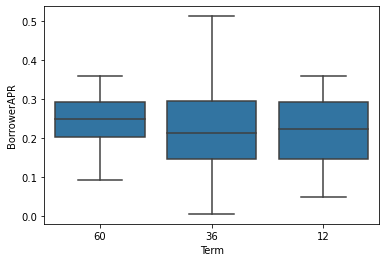

In [107]:
sns.boxplot(data=loan_df_subset, x='Term', y='BorrowerAPR', color=sns_color);

The length of the loan does not provide much information except that it reveals how largely the borrower APR varies with a loan term of 36 months. For loanees who provided their income ranges, we also see how the median APR decreases steadily with an increasing income range. It seems that people earning higher tend to receive lower APRs.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I noticed that the upper and lower credit scores and the APR have a moderately negative correlation of -0.40. Also, the Loaned amount influences the APR in some way, although this is not clearly evident at first sight. But generally, higher loan amounts attract a lower APR while lower loan amounts attract higher APR. It also seems that a higher income attracts a lower APR. Further, the better the Prosper Rating, the lower the APR. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There's actually a high correlation of 0.93 between the loaned amount and the monthly payment, which means larger sums are to be paid monthly for larger loans and vice versa. We can also observe some interaction between the prosper rating and the loaned amount, due to how both features influence the APR. Concretely, loan amounts greater than 15,000 have the smallest variance in the APR because those loans are secured mostly by loanees whose prosper scores are much better. In other words, higher prosper ratings are majorly associated with higher loan amounts.

## Multivariate Exploration

Here I want to investigate whether term has an effect on the observed relationship between the loaned amount and the APR, as well as build upon some of the relationships seen in the previous section.

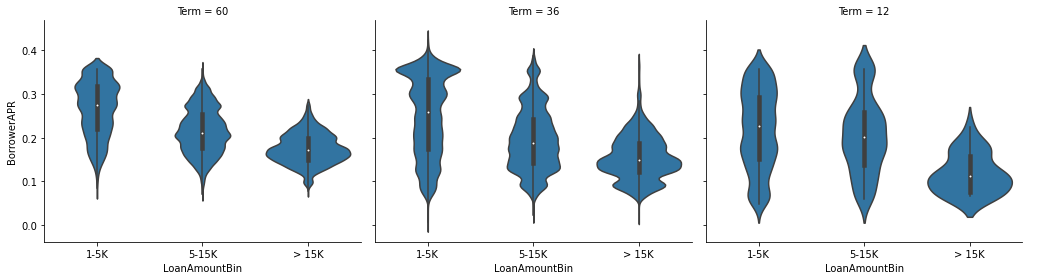

In [104]:
f = sns.FacetGrid(data=loan_df, aspect=1.2, height=4, col='Term')
f.map(sns.violinplot, 'LoanAmountBin', 'BorrowerAPR', order=['1-5K', '5-15K', '> 15K'])
f.add_legend();

In [73]:
income_range_by_rating = loan_df.groupby(['ProsperRating (Alpha)'],
                                         as_index=False)['IncomeRange'].value_counts(normalize=True)

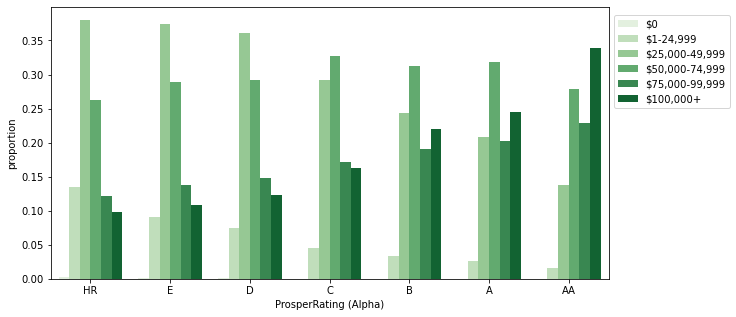

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=income_range_by_rating,
            x='ProsperRating (Alpha)',
            y='proportion',
            hue='IncomeRange',
            palette='Greens')

plt.legend(bbox_to_anchor=(1.0, 0.8), loc='center left');

The proportion of loanees earning high amounts increases as the Prosper score becomes better from left to right while the proportion of those earning lower, for example, between 1 and 25K USD decreases with increasing prosper rating, though this change is less pronounced compared to the former. 

In [87]:
apr_by_income_and_loan = loan_df.groupby(['IncomeRange', 'LoanAmountBin'])['BorrowerAPR'].mean().reset_index()

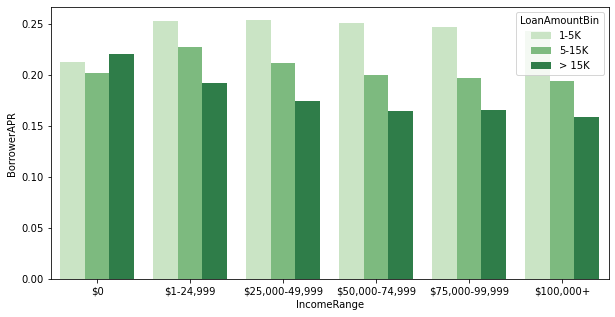

In [94]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=apr_by_income_and_loan,
            x='IncomeRange',
            y='BorrowerAPR',
            hue='LoanAmountBin',
            ax=ax,
            palette='Greens');

We quickly notice a few things here. First, for loans greater than 15K, we can see how the APR becomes smaller as the income range increases. This same effect is noticeable in the loan range of 5-15K. However, it is the opposite for loans between 1-5K as the borrower APR is seen to increase (though not very much) for those on the higher end of the income range.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
In this part of my investigation, I observed that the loan term again didn't add much information except that there is again high variability in the APR for a loan term of 36 months across the binned loan amounts ( this was captured earlier during the bivariate exploration). However, we do see how the income range strengthens the binned loaned amounts in terms of looking at average APR. For example, the average APR decreases with increasing income range for loan amounts higher than 15,000 while it seems to increase and stay almost the same for loan amounts between 1 and 5,000.

### Were there any interesting or surprising interactions between features?
One interesting interaction was observed between the prosper rating and the proportion of loanees across the various income ranges. The proportion of loanees earning high amounts increases as the Prosper score becomes better, whileit is the reverse for those earning lower, though it is not very pronounced. 

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

